<h1 align="center">Feature Engineering and Data Preperation</h1>

<br>

Feature engineering is the process of using domain knowledge to extract features from raw data via data mining techniques.

Three general approaches include:
- extracting information
- combining information
- transforming information

While these all are widely used and important, at this point, i'll only talk about transforming information.

**Transforming information**

- Two common ways to transform information are
    - Integer encoding
    - One-hot encoding (dummy variables)
    

**Integer encoding**
- With integer encoding, you can directly convert categories into intergers; 1, 2, 3,..., n.
- Suppose you have a Country feature that contains 4 countries; Finland, Sweden, Norway and Estonia.
- You could label them as 1, 2, 3 and 4.
- A possible issue with integer encoding, however, is that it implies **ordering** and **relationship**, because the machine learning algorithms are not going to fully understand that in this particular case, the integers are actually representing categories.
- Instead of thinking them as categories, the ML algorithm is going to think them as being on some sort of linear scale (a formal word for this is **ordinal variable**).
- You may see the problem now with integer coding and non-ordinal variables (variables that do not have a meaningful order).
- In this country example we are implying that Sweden (2) is twice the value of Finland (1), and that Estonia (4) is four times the value of Finland. That makes no sense in this particular case.
- However, if for example you have a "Medal" feature, that contains 3 categories; gold, silver and bronze. Then, it definitely makes sense to use integer encoding, since these categories have a natural and meaningful order.

**One-hot encoding (dummy variables)**
- Convert each category into individual features that are either 0 or 1, based on if they are the category or not.
- Suppose, again, that you have a Country feature that contains 4 countries; Finland, Sweden, Norway and Estonia.
- With one-hot encoding you would create 4 different features out of this one Country feature.
- All of the countries would represent their own feature. 
- For example, Finland feature would get a value of 1 if the category is Finland, and zero otherwise.

<br>

<h1 align="center">Outliers</h1>

<br>

Let's create some data from a normal distribution.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [261]:
# 100 normally distributed human ages, with a mean of 50 and a standard deviation of 13
ages = np.random.normal(loc=50, scale=13, size=100)
# Round the ages to have zero decimals
ages = np.round(ages, 0)

When trying to detect outliers, a good start is to check the distribution of the data.

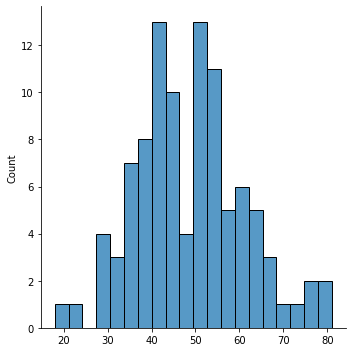

In [262]:
sns.displot(ages, bins=20);

Let's work with a real data set.

In [263]:
Housing = pd.read_csv("C:/Users/testi/Desktop/ML/DATA/Ames_Housing_Data.csv")

In [264]:
Housing.shape

(2930, 81)

In [265]:
# SalePrice is the label (response variable).
Housing.head(3)

,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000


<br>

**Correlation between the features and the label**
- It is generally desirable for explanatory variables to have a strong correlation with the response variable in statistical modeling, as this can improve the accuracy and predictive power of the model.
- When an explanatory variable has a strong correlation with the response variable, it means that there is a strong relationship between the two variables, and changes in the explanatory variable are likely to result in corresponding changes in the response variable. 
- This allows the model to make more accurate predictions about the response variable based on the values of the explanatory variables. 
- Therefore, one should always check the correlations between the features and the label. 
- If an explanatory variable has no correlation with the response variable, it is unlikely to be useful in predicting or explaining the response variable, and it may be reasonable to consider dropping the variable from the model.

In [266]:
# Check the (pearson) correlation between the features and the label
Housing.corr()["SalePrice"].sort_values(ascending=False)

SalePrice          1.000000
Overall Qual       0.799262
Gr Liv Area        0.706780
Garage Cars        0.647877
Garage Area        0.640401
Total Bsmt SF      0.632280
1st Flr SF         0.621676
Year Built         0.558426
Full Bath          0.545604
Year Remod/Add     0.532974
Garage Yr Blt      0.526965
Mas Vnr Area       0.508285
TotRms AbvGrd      0.495474
Fireplaces         0.474558
BsmtFin SF 1       0.432914
Lot Frontage       0.357318
Wood Deck SF       0.327143
Open Porch SF      0.312951
Half Bath          0.285056
Bsmt Full Bath     0.276050
2nd Flr SF         0.269373
Lot Area           0.266549
Bsmt Unf SF        0.182855
Bedroom AbvGr      0.143913
Screen Porch       0.112151
Pool Area          0.068403
Mo Sold            0.035259
3Ssn Porch         0.032225
BsmtFin SF 2       0.005891
Misc Val          -0.015691
Yr Sold           -0.030569
Bsmt Half Bath    -0.035835
Low Qual Fin SF   -0.037660
MS SubClass       -0.085092
Overall Cond      -0.101697
Kitchen AbvGr     -0

Let's plot the feature with the highest correlation (Overall Qual) with the label.

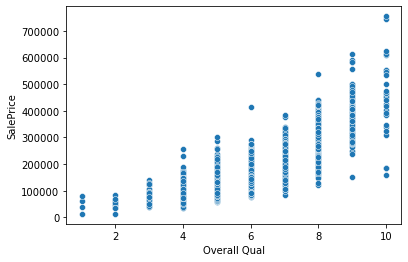

In [267]:
sns.scatterplot(x="Overall Qual", y="SalePrice", data=Housing);

- Notice how when the overall quality gets higher, the sale prices start to range more.
- From this plot alone, however, it is not easy to tell, if there are outliers present.
- It is worth noting, however, that three houses on quality groups 9 and 10 are selling for a really low price compared to the other houses on those groups.

Let's plot the feature with the second highest correlation (Gr Liv Area) with the label

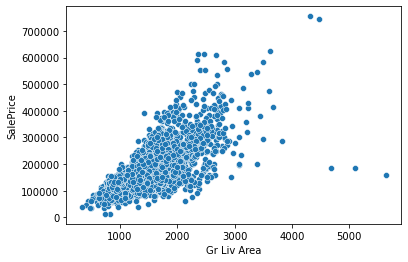

In [268]:
sns.scatterplot(x="Gr Liv Area", y="SalePrice", data=Housing);

- We immediately see that, again, there are three houses that have a really large living area, but are being sold for a low price.
- Let's try to use Pandas filtering to figure out if these are the same houses as in the previous plot.

In [269]:
Housing[(Housing["Overall Qual"] > 8) & (Housing["Gr Liv Area"] > 4000) &  (Housing["SalePrice"] < 300000)] 

,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
1498,908154235,60,RL,313.0,63887,Pave,NaN,IR3,Bnk,AllPub,...,480,Gd,NaN,NaN,0,1,2008,New,Partial,160000
2180,908154195,20,RL,128.0,39290,Pave,NaN,IR1,Bnk,AllPub,...,0,NaN,NaN,Elev,17000,10,2007,New,Partial,183850
2181,908154205,60,RL,130.0,40094,Pave,NaN,IR1,Bnk,AllPub,...,0,NaN,NaN,NaN,0,10,2007,New,Partial,184750


- When combining the information that we got from the plots on the three data points (Overall Qual > 8, Gr Liv Area > 4000, SalePrice < 300000), we get three data points.
- Therefore, we can definitely say that the three outliers from both plots are the same houses.
- These three high quality homes that have a really large living area are going to be a problem, if left untouched, since it is clear that these features (quality, living space) should indicate a higher sale price.
- If they are left to the data, our model is not going to be able to generalize to the relationship of either 
    - higher quality $\rightarrow$ higher sale price
    - higher living area $\rightarrow$ higher price.
    
It would be pretty unreasonable to go through this same procedure for each an every one of these variables, but the main point is that you should atleast do this to the features that have the highest correlation with the label. This is because the features that have the highest correlation with the label, are going to be the features that explain most of the variability of the label. Therefore, if they have outliers, it greatly impacts the whole model.

Let's go ahead and remove the three data points (rows) from the data.

In [270]:
outliers = Housing[(Housing["Overall Qual"] > 8) & (Housing["Gr Liv Area"] > 4000) &  (Housing["SalePrice"] < 300000)] 

In [271]:
outliers.index.values

array([1498, 2180, 2181], dtype=int64)

In [272]:
Housing.shape

(2930, 81)

In [273]:
Housing = Housing.drop(outliers.index.values, axis=0)

In [274]:
Housing.shape

(2927, 81)

- 3 rows has been removed from the dataframe.

Let's see the plot again to confirm that the three outliers have been removed.

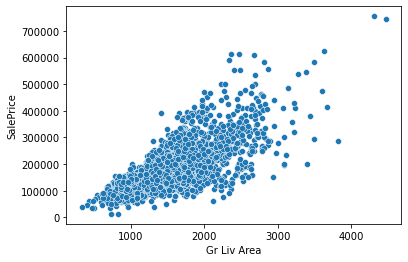

In [275]:
sns.scatterplot(x="Gr Liv Area", y="SalePrice", data=Housing);

- Notice how the three outliers are gone.
- Now we have a general trend that makes sense.

<br>

<h2 align="center">Missing Data</h2>

<br>

In [276]:
Housing.shape

(2927, 81)

In [277]:
Housing.head(3)

,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000


- The PID column is used as a unique indetifier for the rows, but since the data frame already has index as a unique identifier, we can drop the PID column.

In [278]:
Housing = Housing.drop("PID", axis=1)

In [279]:
Housing.shape

(2927, 80)

Now, let's check what features are missing. For this, we're going to create a function that's going to report back the percentage of rows from each feature that is missing. Note that we are not really that interested in the features that are not missing any data. Therefore, we should specify that the function returns only the features that are missing some data.

In [280]:
def percent_missing(df):
    percent_nan = (Housing.isnull().sum() / len(Housing)) * 100
    percent_nan = percent_nan[percent_nan > 0].sort_values(ascending=False)
    return percent_nan

In [281]:
percent_nan = percent_missing(Housing)

In [282]:
percent_nan

Pool QC           99.590024
Misc Feature      96.412709
Alley             93.235395
Fence             80.457807
Fireplace Qu      48.582166
Lot Frontage      16.740690
Garage Cond        5.432183
Garage Qual        5.432183
Garage Finish      5.432183
Garage Yr Blt      5.432183
Garage Type        5.363854
Bsmt Exposure      2.835668
BsmtFin Type 2     2.767339
BsmtFin Type 1     2.733174
Bsmt Qual          2.733174
Bsmt Cond          2.733174
Mas Vnr Area       0.785787
Mas Vnr Type       0.785787
Bsmt Half Bath     0.068329
Bsmt Full Bath     0.068329
Total Bsmt SF      0.034165
Bsmt Unf SF        0.034165
Garage Cars        0.034165
Garage Area        0.034165
BsmtFin SF 2       0.034165
BsmtFin SF 1       0.034165
Electrical         0.034165
dtype: float64

Let's visualize the missing values with a barplot.

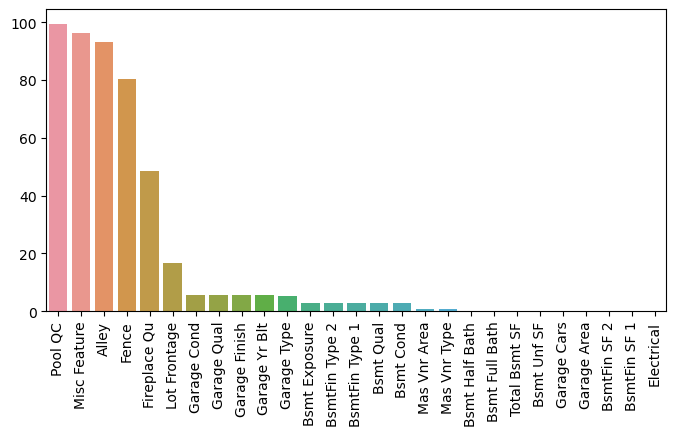

In [283]:
plt.figure(figsize=(8, 4), dpi=100)
sns.barplot(x=percent_nan.index, y=percent_nan)
plt.xticks(rotation=90);

- In the case of features that have just a few missing rows, we can consider either dropping these few rows or filling them in with a reasonable assumption based off domain knowledge.

In [284]:
# Filter for features that have less than 1 % of rows missing
percent_nan[percent_nan < 1]

Mas Vnr Area      0.785787
Mas Vnr Type      0.785787
Bsmt Half Bath    0.068329
Bsmt Full Bath    0.068329
Total Bsmt SF     0.034165
Bsmt Unf SF       0.034165
Garage Cars       0.034165
Garage Area       0.034165
BsmtFin SF 2      0.034165
BsmtFin SF 1      0.034165
Electrical        0.034165
dtype: float64

In [285]:
np.round(100 / len(Housing), 6)

0.034165

- So 1 row equals 0.034165 % of the total amount of rows for each feature.
- This number looks oddly familiar.

In [286]:
percent_nan[percent_nan < 1][4:11]

Total Bsmt SF    0.034165
Bsmt Unf SF      0.034165
Garage Cars      0.034165
Garage Area      0.034165
BsmtFin SF 2     0.034165
BsmtFin SF 1     0.034165
Electrical       0.034165
dtype: float64

- For all of these features, there is only one row missing.

In [287]:
np.round(2 * (100 / len(Housing)), 6)

0.068329

In [288]:
percent_nan[percent_nan < 1][2:4]

Bsmt Half Bath    0.068329
Bsmt Full Bath    0.068329
dtype: float64

- For these two features, there is only two rows missing.

Let's try to explore if the rows that have missing features are actually the one and same row.

In [289]:
# Fetch the row where there is a missing value on "Eletrical", 
# and see what the value of "Garage Area" is for that row.
Housing[Housing["Electrical"].isnull()]["Garage Area"]

1577    400.0
Name: Garage Area, dtype: float64

- So the row that has a missing value on "Electrical", is not the same row that has a missing value on "Garage Area"

A more efficient way of doing this is trying to drop the rows that contain missing values for these features, and then filtering again for the features that have only one row missing. If some of the features that contain only one missing row happened to be on the same row, they should all then be removed.

In [290]:
# Drop the rows from "Eletrical" and "Garage Area" that contain missing values.
Housing = Housing.dropna(axis=0, subset=["Electrical", "Garage Area"])

In [291]:
percent_nan_cleaned = percent_missing(Housing)

In [292]:
percent_nan_cleaned[percent_nan_cleaned < 1]

Mas Vnr Area      0.786325
Mas Vnr Type      0.786325
Bsmt Half Bath    0.068376
Bsmt Full Bath    0.068376
Bsmt Unf SF       0.034188
BsmtFin SF 2      0.034188
BsmtFin SF 1      0.034188
Total Bsmt SF     0.034188
dtype: float64

In [293]:
Housing[Housing["Bsmt Half Bath"].isnull()][["Bsmt Half Bath", "Bsmt Full Bath"]]

,Bsmt Half Bath,Bsmt Full Bath
1341,NaN,NaN
1497,NaN,NaN


- We can see that the two rows that have missing information on two different features of basement baths, are the two and same rows.
- Perhaps these two houses did not have a basement?

Let's take a look at the feature description.

In [294]:
with open("C:/Users/testi/Desktop/ML/DATA/Ames_Housing_Feature_Description.txt", "r") as f:
    print(f.read())

MSSubClass: Identifies the type of dwelling involved in the sale.	

        20	1-STORY 1946 & NEWER ALL STYLES
        30	1-STORY 1945 & OLDER
        40	1-STORY W/FINISHED ATTIC ALL AGES
        45	1-1/2 STORY - UNFINISHED ALL AGES
        50	1-1/2 STORY FINISHED ALL AGES
        60	2-STORY 1946 & NEWER
        70	2-STORY 1945 & OLDER
        75	2-1/2 STORY ALL AGES
        80	SPLIT OR MULTI-LEVEL
        85	SPLIT FOYER
        90	DUPLEX - ALL STYLES AND AGES
       120	1-STORY PUD (Planned Unit Development) - 1946 & NEWER
       150	1-1/2 STORY PUD - ALL AGES
       160	2-STORY PUD - 1946 & NEWER
       180	PUD - MULTILEVEL - INCL SPLIT LEV/FOYER
       190	2 FAMILY CONVERSION - ALL STYLES AND AGES

MSZoning: Identifies the general zoning classification of the sale.
		
       A	Agriculture
       C	Commercial
       FV	Floating Village Residential
       I	Industrial
       RH	Residential High Density
       RL	Residential Low Density
       RP	Residential Low Density Park 
       RM

- It indeed seems that if there is missing information on basement, the house had no basement.
- Instead of dropping these rows, we can 
    - fill them with zeros (if the feature type is numeric) 
    - label them as "None" (if the feature tpye is string)

In [295]:
# With this command you can suppress a SettingWithCopyWarning.
# In this case, Pandas falsely raised this error message on the next two filterings.
# Remember that when you suppress these warnings with this code,
# you have to remember to turn it back to "warn", which is the default.
# Otherwise you won't get any error messages that might actually be justified.
pd.options.mode.chained_assignment = None

# Set the numeric Bsmt columns to 0
bsmt_num_cols = ['BsmtFin SF 1', 'BsmtFin SF 2', 'Bsmt Unf SF','Total Bsmt SF', 'Bsmt Full Bath', 'Bsmt Half Bath']
Housing.loc[:, bsmt_num_cols] = Housing.loc[:, bsmt_num_cols].fillna(0)

# Set the string  Bsmt columns to None
bsmt_str_cols =  ['Bsmt Qual', 'Bsmt Cond', 'Bsmt Exposure', 'BsmtFin Type 1', 'BsmtFin Type 2']
Housing.loc[:,  bsmt_str_cols] = Housing.loc[:, bsmt_str_cols].fillna("None")

# Turn warning messages back on
pd.options.mode.chained_assignment = "warn"

In [296]:
Housing[Housing["Bsmt Full Bath"].isnull()]

,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice


- No more missing values on Bsmt Full Bath column.

Once more, let's calculate the percentage of the missing values.

In [297]:
percent_nan_cleaned1 = percent_missing(Housing)

In [298]:
percent_nan_cleaned1

Pool QC          99.589744
Misc Feature     96.410256
Alley            93.230769
Fence            80.478632
Fireplace Qu     48.547009
Lot Frontage     16.752137
Garage Yr Blt     5.401709
Garage Finish     5.401709
Garage Qual       5.401709
Garage Cond       5.401709
Garage Type       5.367521
Mas Vnr Type      0.786325
Mas Vnr Area      0.786325
dtype: float64

- We still have "Mas Vnr Type" and "Mas Vnr Area" features, that contain less than 1 % of missing rows.
- From the feature description it seems that  Mas Vnr Type is a string column, and Mas Vnr Area is a numerical column. 
- Let's fill these again by the same logic as before with Bsmt.

In [299]:
Housing["Mas Vnr Type"] = Housing["Mas Vnr Type"].fillna("None")
Housing["Mas Vnr Area"] = Housing["Mas Vnr Type"].fillna(0)

In [300]:
percent_nan_cleaned2 = percent_missing(Housing)

In [301]:
percent_nan_cleaned2

Pool QC          99.589744
Misc Feature     96.410256
Alley            93.230769
Fence            80.478632
Fireplace Qu     48.547009
Lot Frontage     16.752137
Garage Yr Blt     5.401709
Garage Finish     5.401709
Garage Qual       5.401709
Garage Cond       5.401709
Garage Type       5.367521
dtype: float64

- Note that domain knowledge plays a huge role in deciding what to do with the missing values.

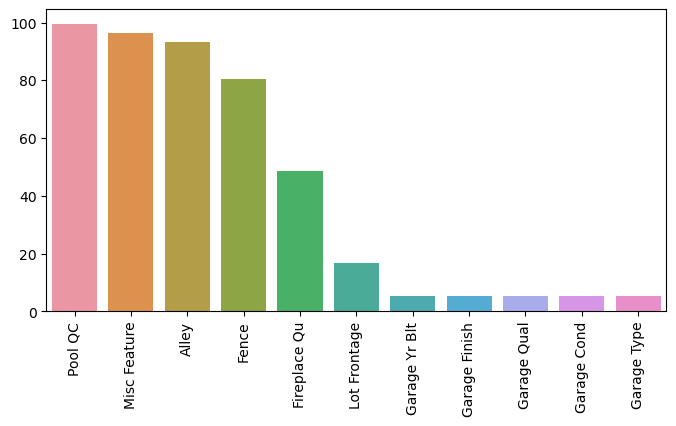

In [302]:
plt.figure(figsize=(8, 4), dpi=100)
sns.barplot(x=percent_nan_cleaned2.index, y=percent_nan_cleaned2)
plt.xticks(rotation=90);

- Notice that we have same problem with these garages that we had with the basement features.
- If an apartment has no garage, then it is likely that all of these features are missing.
- The fact that all of the garage features have the same amount of missing rows supports this conclusion.
- This can of course be checked from the feature description from before.
- It indeed seems that GarageType is NA if the apartment has no garage.
- Then, if the apartment has no garage, the other features are going to be missing too of course.

Let's deal with this the same way we dealt previously with the numeric and categorical columns.
- If the feature type is numeric $\rightarrow$ fillna(0)
- If the feature type is categorical $\rightarrow$ fillna("None")

In [303]:
Garage_categorical = ["Garage Type", "Garage Finish", "Garage Qual", "Garage Cond"]
Garage_numeric = "Garage Yr Blt"

Housing.loc[:, Garage_categorical] = Housing.loc[:, Garage_categorical].fillna("None")
Housing.loc[:, Garage_numeric] = Housing.loc[:, Garage_numeric].fillna(0)

In [304]:
percent_nan_cleaned3 = percent_missing(Housing)

In [305]:
percent_nan_cleaned3

Pool QC         99.589744
Misc Feature    96.410256
Alley           93.230769
Fence           80.478632
Fireplace Qu    48.547009
Lot Frontage    16.752137
dtype: float64

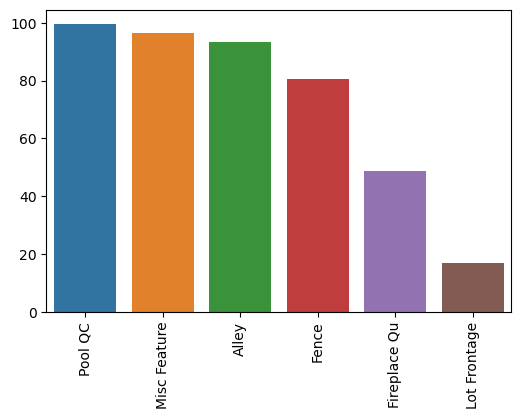

In [306]:
plt.figure(figsize=(6, 4), dpi=100)
sns.barplot(x=percent_nan_cleaned3.index, y=percent_nan_cleaned3)
plt.xticks(rotation=90);

Next we're going to have to figure out what to do with these features that have a large amount of missing rows. For example, "Pool Qc" feature has 99.6 % of its rows missing. This is probably due to the fact the very few houses have a swimming pool.
- There is so much missing data on Pool Qc, Misc Feature, Alley and Fence features, that let's just drop these data features from the data frame.

In [307]:
Housing.shape

(2925, 80)

In [308]:
Housing = Housing.drop(["Pool QC", "Misc Feature", "Alley", "Fence"], axis=1)

In [309]:
Housing.shape

(2925, 76)

- 4 columns has been dropped, as expected.

In [311]:
percent_nan_cleaned4 = percent_missing(Housing)

In [312]:
percent_nan_cleaned4

Fireplace Qu    48.547009
Lot Frontage    16.752137
dtype: float64

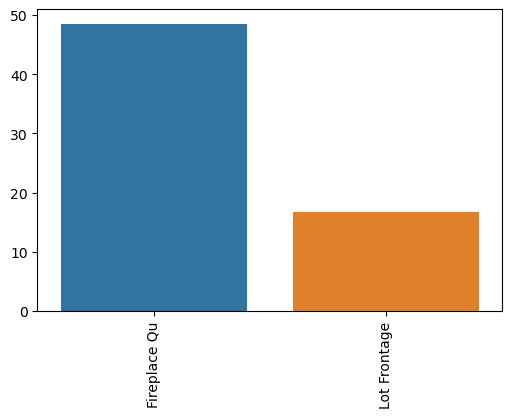

In [314]:
plt.figure(figsize=(6, 4), dpi=100)
sns.barplot(x=percent_nan_cleaned4.index, y=percent_nan_cleaned4)
plt.xticks(rotation=90);

In [315]:
Housing["Fireplace Qu"].value_counts()

Gd    741
TA    600
Fa     75
Po     46
Ex     43
Name: Fireplace Qu, dtype: int64

- Fireplace Qu is a categorical column, so let's fill its missing values with "None".

In [319]:
Housing.loc[:, "Fireplace Qu"] = Housing.loc[:, "Fireplace Qu"].fillna("None")

In [320]:
percent_nan_cleaned5 = percent_missing(Housing)

In [321]:
percent_nan_cleaned5

Lot Frontage    16.752137
dtype: float64

In [325]:
Housing["Lot Frontage"]

0       141.0
1        80.0
2        81.0
3        93.0
4        74.0
        ...  
2925     37.0
2926      NaN
2927     62.0
2928     77.0
2929     74.0
Name: Lot Frontage, Length: 2925, dtype: float64

- For this feature, we can no longer just fill it with "None" or zero.
- We're going to have to use some statistical estimation based on another column to fill in the missing values.

    $\, \rightarrow \,$ (domain knowledge)
    
LotFrontage: "Linear feet of street connected to property". \
Neighborhood = "Physical locations within Ames city limits".

We're going to make a domain knowledge assumption that these features are associated with each other.
- If Lot Frontage value is missing, we're going to fill it with the mean Lot Frontage value of the corresponding neighborhood. 
- For this operation, we can use the df.transform() method.
- https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.transform.html

In [331]:
Housing.groupby("Neighborhood")["Lot Frontage"].mean()

Neighborhood
Blmngtn    46.900000
Blueste    27.300000
BrDale     21.500000
BrkSide    55.789474
ClearCr    88.150000
CollgCr    71.336364
Crawfor    69.951807
Edwards    64.794286
Gilbert    74.207207
Greens     41.000000
GrnHill          NaN
IDOTRR     62.383721
Landmrk          NaN
MeadowV    25.606061
Mitchel    75.144444
NAmes      75.210667
NPkVill    28.142857
NWAmes     81.517647
NoRidge    91.629630
NridgHt    84.184049
OldTown    61.777293
SWISU      59.068182
Sawyer     74.551020
SawyerW    70.669811
Somerst    64.549383
StoneBr    62.173913
Timber     81.303571
Veenker    72.000000
Name: Lot Frontage, dtype: float64

In [334]:
Housing["Lot Frontage"] = Housing.groupby("Neighborhood")["Lot Frontage"].transform(lambda x: x.fillna(x.mean()))

- group by the Neighborhood feature
- use chaining to only return the Lot Frontage column
- for every value (x) in this Lot Frontage column, fill in the missing values with the corresponding mean value of that neighborhood (this is achieved with the transform and lambda functions).

In [335]:
percent_nan_cleaned6 = percent_missing(Housing)

In [337]:
percent_nan_cleaned6

Lot Frontage    0.102564
dtype: float64

In [344]:
# Check how many values labeled as missing in the Lot Frontage column
Housing.isnull()["Lot Frontage"].sum()

3

- You may wonder that why we still have missing values? Didn't we just fill the missing values in the Lot Frontage column?
- This is because if you take a look at the groupby call above where the Lot Frontage means are presented by Neighborhood, some of the means are NaN, meaning that there are no records of the Lot Frontage feature on that specific Neighborhood.
- For these 3 missing values, we're just going to fill them as zeros.

In [345]:
Housing.loc[:, "Lot Frontage"] = Housing.loc[:, "Lot Frontage"].fillna(0)

In [355]:
Housing.isnull().any().sum()

0

- There are no missing values anymore in the Housing data frame.

<br>

<h3 align="left">Categorical Data - Encoding Options</h3>

In [384]:
# Change the data type of the column
Housing["Ms SubClass"] = Housing["MS SubClass"].apply(str)

Let's explore how pd.get_dummies() works.

In [385]:
Country =  pd.Series(["FIN", "FIN", "SWE", "FIN", "SWE", "GER", "GER", "FIN"])

In [386]:
Country

0    FIN
1    FIN
2    SWE
3    FIN
4    SWE
5    GER
6    GER
7    FIN
dtype: object

In [367]:
pd.get_dummies(Country)

,FIN,GER,SWE
0,1,0,0
1,1,0,0
2,0,0,1
3,1,0,0
4,0,0,1
5,0,1,0
6,0,1,0
7,1,0,0


- You pass in the data (Pandas Series in our example), and Pandas performs the one-hot encoding.

Let's split the data frame into string objects and numeric objects (Pandas defines a string as "object").

In [387]:
# String objects
object_cols = Housing.select_dtypes(include="object")
# Numeric objects
numeric_cols = Housing.select_dtypes(exclude="object")

- The reason why we do this is that we want to transform the string features into dummy variables, and then reattach it again with the numeric features to get the original data frame, but now with the one-hot encoded categorical variables.

In [388]:
objects_cols_dummies = pd.get_dummies(object_cols, drop_first=True)

- When you use drop_first=True, the first category of each categorical variable is dropped and is implicitly included as the reference category in the model. 
- This means that the omitted category is still present in the model but is not represented by a separate dummy variable.

In [389]:
objects_cols_dummies

,MS Zoning_C (all),MS Zoning_FV,MS Zoning_I (all),MS Zoning_RH,MS Zoning_RL,MS Zoning_RM,Street_Pave,Lot Shape_IR2,Lot Shape_IR3,Lot Shape_Reg,...,Ms SubClass_30,Ms SubClass_40,Ms SubClass_45,Ms SubClass_50,Ms SubClass_60,Ms SubClass_70,Ms SubClass_75,Ms SubClass_80,Ms SubClass_85,Ms SubClass_90
0,0,0,0,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,1,0,0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,1,0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,1,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2925,0,0,0,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2926,0,0,0,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2927,0,0,0,0,1,0,1,0,0,1,...,0,0,0,0,0,0,0,0,1,0
2928,0,0,0,0,1,0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0


Now, let's concatenate the numeric and categorical (dummy-coded) columns back together as the final data frame.

In [393]:
final_df = pd.concat([numeric_cols, objects_cols_dummies], axis=1)

In [394]:
final_df

,MS SubClass,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,BsmtFin SF 1,BsmtFin SF 2,Bsmt Unf SF,...,Ms SubClass_30,Ms SubClass_40,Ms SubClass_45,Ms SubClass_50,Ms SubClass_60,Ms SubClass_70,Ms SubClass_75,Ms SubClass_80,Ms SubClass_85,Ms SubClass_90
0,20,141.000000,31770,6,5,1960,1960,639.0,0.0,441.0,...,0,0,0,0,0,0,0,0,0,0
1,20,80.000000,11622,5,6,1961,1961,468.0,144.0,270.0,...,0,0,0,0,0,0,0,0,0,0
2,20,81.000000,14267,6,6,1958,1958,923.0,0.0,406.0,...,0,0,0,0,0,0,0,0,0,0
3,20,93.000000,11160,7,5,1968,1968,1065.0,0.0,1045.0,...,0,0,0,0,0,0,0,0,0,0
4,60,74.000000,13830,5,5,1997,1998,791.0,0.0,137.0,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2925,80,37.000000,7937,6,6,1984,1984,819.0,0.0,184.0,...,0,0,0,0,0,0,0,1,0,0
2926,20,75.144444,8885,5,5,1983,1983,301.0,324.0,239.0,...,0,0,0,0,0,0,0,0,0,0
2927,85,62.000000,10441,5,5,1992,1992,337.0,0.0,575.0,...,0,0,0,0,0,0,0,0,1,0
2928,20,77.000000,10010,5,5,1974,1975,1071.0,123.0,195.0,...,0,0,0,0,0,0,0,0,0,0


- Finally, after the feature engineering and data preperation process, our data frame is cleaned, transformed, and ready to be used in the house prediction.